In [2]:
import rdkit

In [3]:
from biopandas.mol2 import PandasMol2

In [4]:
pmol = PandasMol2().read_mol2('Downloads/mol-cycle-gan-master/284558682.mol2')

# Read and Display Molecule Information

In [5]:
print('Molecule ID: %s' % pmol.code)
print('\nRaw MOL2 file contents:\n\n%s\n...' % pmol.mol2_text)

Molecule ID: ZINC000072560182

Raw MOL2 file contents:

@<TRIPOS>MOLECULE
ZINC000072560182
36    37    1     0     0
SMALL
USER_CHARGES
@<TRIPOS>ATOM
1      C1     -0.0187    1.5258    0.0104 C.3      1 ZINC000072560182   -0.1700
2      C2      0.0021   -0.0041    0.0020 C.3      1 ZINC000072560182    0.1600
3      H3      0.5123   -0.3556   -0.8948 H        1 ZINC000072560182    0.0900
4      C4     -1.4333   -0.5336    0.0129 C.3      1 ZINC000072560182   -0.1300
5      C5     -1.4157   -2.0577   -0.1212 C.3      1 ZINC000072560182    0.0700
6      O6     -2.7563   -2.5523   -0.1111 O.3      1 ZINC000072560182   -0.5800
7      N7      0.7106   -0.4894    1.1889 N.am     1 ZINC000072560182   -0.7400
8      C8      2.0538   -0.5998    1.1737 C.2      1 ZINC000072560182    0.7100
9      O9      2.6775   -0.2966    0.1748 O.2      1 ZINC000072560182   -0.5700
10     N10     2.7056   -1.0463    2.2656 N.am     1 ZINC000072560182   -0.6600
11     C11     4.1087   -1.1616    2.2497 C.2     

In [6]:
mapper = {'C':'gray','O':'red','N':'blue','H':'black'}

normal = 150.0
hydrogen = 5.0
mapper2 = {'C':normal,'O':normal,'N':normal,'H':hydrogen}
print pmol.df.atom_name
first_colors = pmol.df.atom_name.apply(lambda x: mapper[x[0]])
first_sizes = pmol.df.atom_name.apply(lambda x: mapper2[x[0]])
colors

0      C1
1      C2
2      H3
3      C4
4      C5
5      O6
6      N7
7      C8
8      O9
9     N10
10    C11
11    C12
12    N13
13    C14
14    N15
15    C16
16    C17
17    C18
18    N19
19    N20
20    C21
21    H22
22    H23
23    H24
24    H25
25    H26
26    H27
27    H28
28    H29
29    H30
30    H31
31    H32
32    H33
33    H34
34    H35
35    H36
Name: atom_name, dtype: object


NameError: name 'colors' is not defined

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Original 2D Molecule

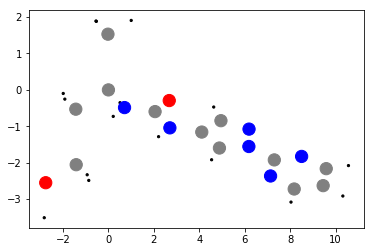

In [8]:
ax = plt.axes()
ax.scatter( pmol.df['x'].values, pmol.df['y'].values,c=first_colors,s=first_sizes)

# Original 3D molecule

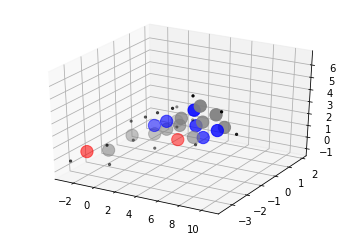

In [9]:
ax = plt.axes(projection='3d')
ax.scatter3D( pmol.df['x'].values, pmol.df['y'].values,pmol.df['z'].values, c=first_colors,s = first_sizes);

In [10]:
voxels = np.dstack((pmol.df['x'].values, pmol.df['y'].values,pmol.df['z'].values))

In [11]:
grid = np.zeros((50,37,25))

# Define Variables

In [12]:
resolution_size_1 = 80
resolution_size_2 = 80
resolution_size_3 = 80
channels = 4
kernel_size = 16

In [13]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Function to Discretize Molecule

#### Because the Molecule is plotted on a continuous 3D plane, we need a function that will convert these points to positions in a 3D array, or like pixel positions in a 3D image. To do this I scale the original coordinates to the scale (0,63) so that they fit in our 64x64x64 cube. Afterwards, i round each resulting position to the nearest integer, introducing error in the process

In [14]:
def convert_to_indeces(dimension_x,dimension_y,dimension_z,molecule):
    scale_x = MinMaxScaler((8,dimension_x-8))
    scale_y = MinMaxScaler((8,dimension_y-8))
    scale_z = MinMaxScaler((8,dimension_z-8))
    scaled_molecule = pd.DataFrame()
    scaled_molecule['x'] = scale_x.fit_transform(molecule[['x']]).flatten()
    scaled_molecule['y'] = scale_y.fit_transform(molecule[['y']]).flatten()
    scaled_molecule['z'] = scale_z.fit_transform(molecule[['z']]).flatten()
    final_molecule = pd.DataFrame()
    final_molecule['x'] = scaled_molecule['x'].apply(lambda x: round(x))
    final_molecule['y'] = scaled_molecule['y'].apply(lambda x: round(x))
    final_molecule['z'] = scaled_molecule['z'].apply(lambda x: round(x))
    errors = pd.DataFrame()
    errors['x'] = np.abs(final_molecule['x'] - scaled_molecule['x'])/dimension_x
    errors['y'] = np.abs(final_molecule['y'] - scaled_molecule['y'])/dimension_y
    errors['z'] = np.abs(final_molecule['z'] - scaled_molecule['z'])/dimension_z
    atoms = pmol.df.atom_name.values
    return final_molecule,errors,atoms

In [15]:
final_molecule_64,error_64,atoms = convert_to_indeces(64,64,64,pmol.df[['x','y','z']])

In [16]:
final_molecule,error,atoms = convert_to_indeces(resolution_size_1,resolution_size_2,resolution_size_3,pmol.df[['x','y','z']])

# Calculate Errors

#### In this cell i compare errors calculated on our 64x64x64 molecule to the 35x50x27 molecule from the paper

In [17]:
error_64_x = np.abs(error_64['x'].sum())
error_35_x = np.abs(error_35['x'].sum())
error_64_y = np.abs(error_64['y'].sum())
error_35_y = np.abs(error_35['y'].sum())
error_64_z = np.abs(error_64['z'].sum())
error_35_z = np.abs(error_35['z'].sum())

NameError: name 'error_35' is not defined

In [18]:
print error_64_x
print error_35_x
print error_64_y
print error_35_y
print error_64_z
print error_35_z

0.1110319776130555


NameError: name 'error_35_x' is not defined

# Plot error as a function of resolution

In [19]:
errors = []
for i in range(2,256):
    final_molecule,error,atoms = convert_to_indeces(i,i,i,pmol.df[['x','y','z']])
    errors.append( error.sum().sum())

ValueError: Minimum of desired feature range must be smaller than maximum. Got (8, -6).

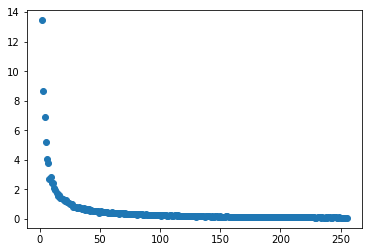

In [1568]:
plt.scatter(range(2,256),errors)

# Add Atom Information to Discretized Molecule Label Encoded

In [1683]:
attempted_molecule = np.zeros((channels,resolution_size_1,resolution_size_2,resolution_size_3))
encoding_mapper = {'C':0,'O':1,'N':2,'H':3}
for i in range(final_molecule.shape[0]):
    attempted_molecule[encoding_mapper[atoms[i][0]]][int(final_molecule.iloc[i]['x'])][int(final_molecule.iloc[i]['y'])][int(final_molecule.iloc[i]['z'])] = 1#encoding_mapper[atoms[i][0]]

# Add Atom Information to Discretized Molecule One Hot Encoded

In [1684]:
attempted_molecule_ohe = np.zeros((resolution_size_1,resolution_size_2,resolution_size_3,channels))
encoding_mapper = {'C':0,'O':1,'N':2,'H':3}
decoding_mapper = {0:'C',1:'O',2:'N',3:'H'}
for i in range(final_molecule.shape[0]):
    attempted_molecule_ohe[int(final_molecule.iloc[i]['x'])][int(final_molecule.iloc[i]['y'])][int(final_molecule.iloc[i]['z'])][encoding_mapper[atoms[i][0]]] = 1

# Discretized 2D Molecule

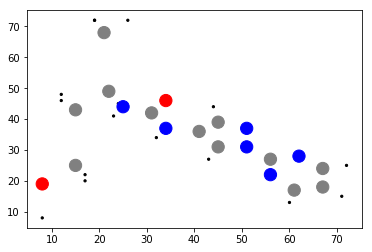

In [1685]:
ax = plt.axes()
ax.scatter( final_molecule['x'].values, final_molecule['y'].values,c=first_colors,s=first_sizes)

# Discretized 3D Molecule

In [1]:
from mpl_toolkits.mplot3d import Axes3D
def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e
def make_ax(grid=False):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(grid)
    return ax
ax = make_ax()
ax.voxels(attempted_molecule, facecolor=first_colors)
plt.show()

NameError: global name 'plt' is not defined

# Perform Wave Transform

#### Perform the Wave Transform as described in https://pubs.acs.org/doi/pdf/10.1021/acs.molpharmaceut.7b01134 . 

In [1687]:
import math
from scipy.ndimage.filters import convolve

In [1688]:
def compute_offset_matrix_gaussian(kernel_size):
    x = range(-kernel_size/2,kernel_size/2)
    y = range(-kernel_size/2,kernel_size/2)
    z = range(-kernel_size/2,kernel_size/2)
    matrix = np.zeros((kernel_size,kernel_size,kernel_size))
    sigma = 4.0
    w = 1/sigma
    clip_distance = 1000#4*sigma
    for i in x:
        for j in y:
            for k in z: 
                matrix[i+kernel_size/2][j+kernel_size/2][k+kernel_size/2] = math.exp(((i**2)+(j**2)+(k**2))/(2*(sigma**2)))
    return matrix

In [1689]:
def compute_offset_matrix_wave(kernel_size):
    x = range(-kernel_size/2,kernel_size/2)
    y = range(-kernel_size/2,kernel_size/2)
    z = range(-kernel_size/2,kernel_size/2)
    matrix = np.zeros((kernel_size,kernel_size,kernel_size))
    sigma = 4.0
    w = 1/sigma
    clip_distance = 4*sigma
    for i in x:
        for j in y:
            for k in z:
                if np.linalg.norm([i,j,k]) < clip_distance:
                    exp_part = (i**2)+(j**2)+(k**2)
                    denom_exp_part = 2*(sigma**2)
                    matrix[i+kernel_size/2][j+kernel_size/2][k+kernel_size/2] = math.exp(-(exp_part/denom_exp_part))* math.cos(2*math.pi*w*math.sqrt(exp_part))

    return matrix

In [1690]:
kernel_matrix = compute_offset_matrix_wave(kernel_size)

In [1691]:

transformed_molecule = np.zeros((resolution_size_1,resolution_size_2,resolution_size_3,channels))
import time

start = time.time()

transformed_molecule[:,:,:,0]= convolve(attempted_molecule[0], kernel_matrix,mode='constant')
transformed_molecule[:,:,:,1]= convolve(attempted_molecule[1], kernel_matrix,mode='constant')
transformed_molecule[:,:,:,2]= convolve(attempted_molecule[2], kernel_matrix,mode='constant')
transformed_molecule[:,:,:,3]= convolve(attempted_molecule[3], kernel_matrix,mode='constant')
print(transformed_molecule.shape)
end = time.time()
print(end - start)
start = time.time()

# transformed_molecule_vectorized_intensities = np.zeros((resolution_size,resolution_size,resolution_size,channels))
# transformed_molecule_vectorized = np.zeros((resolution_size,resolution_size,resolution_size,channels))
# # for h in range(4):
# for i in range(0,resolution_size):
#     print i
#     for j in range(0,resolution_size):
#         for k in range(0,resolution_size):
#             val = wavelet_transform(i+kernel_size/2,j+kernel_size/2,k+kernel_size/2,zero_padded_molecule,kernel_size,kernel_matrix,h)
#             transformed_molecule_vectorized_intensities[i][j][k] = val
#             binarized = np.where(val !=0, 1, 0)
#             transformed_molecule_vectorized[i][j][k] = binarized
# end = time.time()
# print(end - start)            

(80, 80, 80, 4)
8.81250214577


# Convert Back to Coordinates

In [1692]:
molecule_coordinates = []
intensities = []
colors = []
for i in range(resolution_size_1):
    for j in range(resolution_size_2):
        for k in range(resolution_size_3):
            for h in range(channels):
                if transformed_molecule[i][j][k][h] >0:
                    
                    molecule_coordinates.append([i,j,k])
                    #intensity = np.sum(np.abs(transformed_molecule[i][j][k]))
                    intensity = transformed_molecule[i][j][k].max()
                    highest_intensity = transformed_molecule[i][j][k].argmax()
                    intensities.append(intensity)
                    colors.append(mapper[decoding_mapper[highest_intensity]])
                    break
intensities = np.array(intensities).reshape(-1,1)    
colors = np.array(colors)

In [1693]:
x_coords = np.array([x[0] for x in molecule_coordinates])
y_coords = np.array([x[1] for x in molecule_coordinates])
z_coords = np.array([x[2] for x in molecule_coordinates])
#scaler = MinMaxScaler((0,100))
#intensities = scaler.fit_transform(intensities)

In [1694]:
colors.shape

(53210,)

In [1695]:
colors.tolist().count('blue')

8437

In [1696]:
x_coords.shape

(53210,)

# Varying Opacities

['black' 'black' 'black' ... 'black' 'black' 'black']


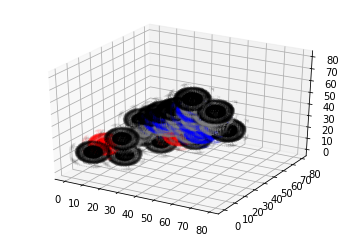

In [1697]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_coords , y_coords,z_coords,s=intensities,c=colors)#095)


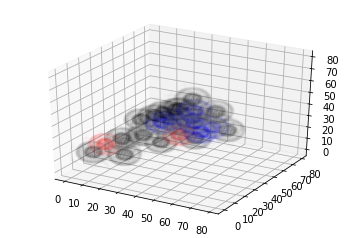

In [1704]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_coords , y_coords,z_coords,s=intensities,c=colors,alpha=.075)

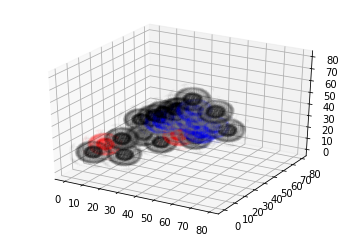

In [1699]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_coords , y_coords,z_coords,s=intensities,c=colors,alpha=.2)#095)

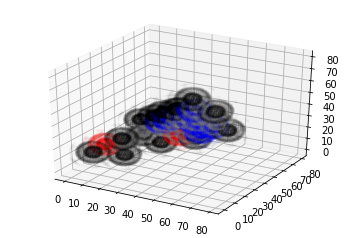

In [1700]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_coords , y_coords,z_coords,s=intensities,c=colors,alpha=.25)#095)

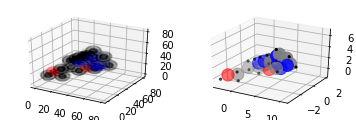

In [1701]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter3D(x_coords , y_coords,z_coords,s=intensities,c=colors,alpha=.04);
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter3D( pmol.df['x'].values, pmol.df['y'].values,pmol.df['z'].values, c=first_colors,s = first_sizes);

In [1525]:
first_colors.tolist().count('red')

2

# View in 2D

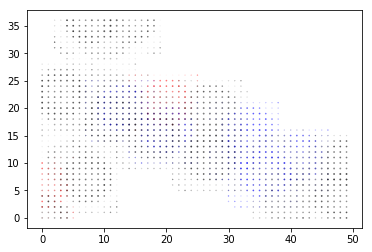

In [1496]:
ax = plt.axes()
ax.scatter( x_coords , y_coords,s=intensities,c=colors,alpha=.1)

In [1468]:
def compute_offset_matrix_wave(kernel_size):
    x = range(-kernel_size/2,kernel_size/2)
    y = range(-kernel_size/2,kernel_size/2)
    z = range(-kernel_size/2,kernel_size/2)
    matrix = np.zeros((kernel_size,kernel_size,kernel_size))
    sigma = 4.0
    w = 1/sigma
    clip_distance = 2*sigma
    for i in x:
        for j in y:
            for k in z:
                if np.linalg.norm([i,j,k]) < clip_distance:
                    exp_part = (i**2)+(j**2)+(k**2)
                    denom_exp_part = 2*(sigma**2)
                    matrix[i+kernel_size/2][j+kernel_size/2][k+kernel_size/2] = math.exp(-(exp_part/denom_exp_part))* math.cos(2*math.pi*w*math.sqrt(exp_part))

    return matrix

In [1471]:
kernel_matrix = compute_offset_matrix_wave(kernel_size)

In [1472]:
attempted_molecule = np.zeros((channels,resolution_size_1,resolution_size_2,resolution_size_3))
encoding_mapper = {'C':0,'O':1,'N':2,'H':3}
for i in range(final_molecule.shape[0]):
    attempted_molecule[encoding_mapper[atoms[i][0]]][int(final_molecule.iloc[i]['x'])][int(final_molecule.iloc[i]['y'])][int(final_molecule.iloc[i]['z'])] = 1#encoding_mapper[atoms[i][0]]

In [1481]:

transformed_molecule_scipy = np.zeros((resolution_size_1,resolution_size_2,resolution_size_3,channels))
import time

start = time.time()

transformed_molecule[:,:,:,0]= convolve(attempted_molecule[0], kernel_matrix,mode='constant')
transformed_molecule[:,:,:,1]= convolve(attempted_molecule[1], kernel_matrix,mode='constant')
transformed_molecule[:,:,:,2]= convolve(attempted_molecule[2], kernel_matrix,mode='constant')
transformed_molecule[:,:,:,3]= convolve(attempted_molecule[3], kernel_matrix,mode='constant')
print(transformed_molecule.shape)
end = time.time()
print(end - start)
start = time.time()

(50, 37, 25, 4)
0.437993049622
